**CrewAI**

**https://github.com/joaomdmoura/crewai**

Cutting-edge framework for orchestrating role-playing, autonomous AI agents. By fostering collaborative intelligence, CrewAI empowers agents to work together seamlessly, tackling complex tasks.

The power of AI collaboration has too much to offer. CrewAI is designed to enable AI agents to assume roles, share goals, and operate in a cohesive unit - much like a well-oiled crew. Whether you're building a smart assistant platform, an automated customer service ensemble, or a multi-agent research team, CrewAI provides the backbone for sophisticated multi-agent interactions.

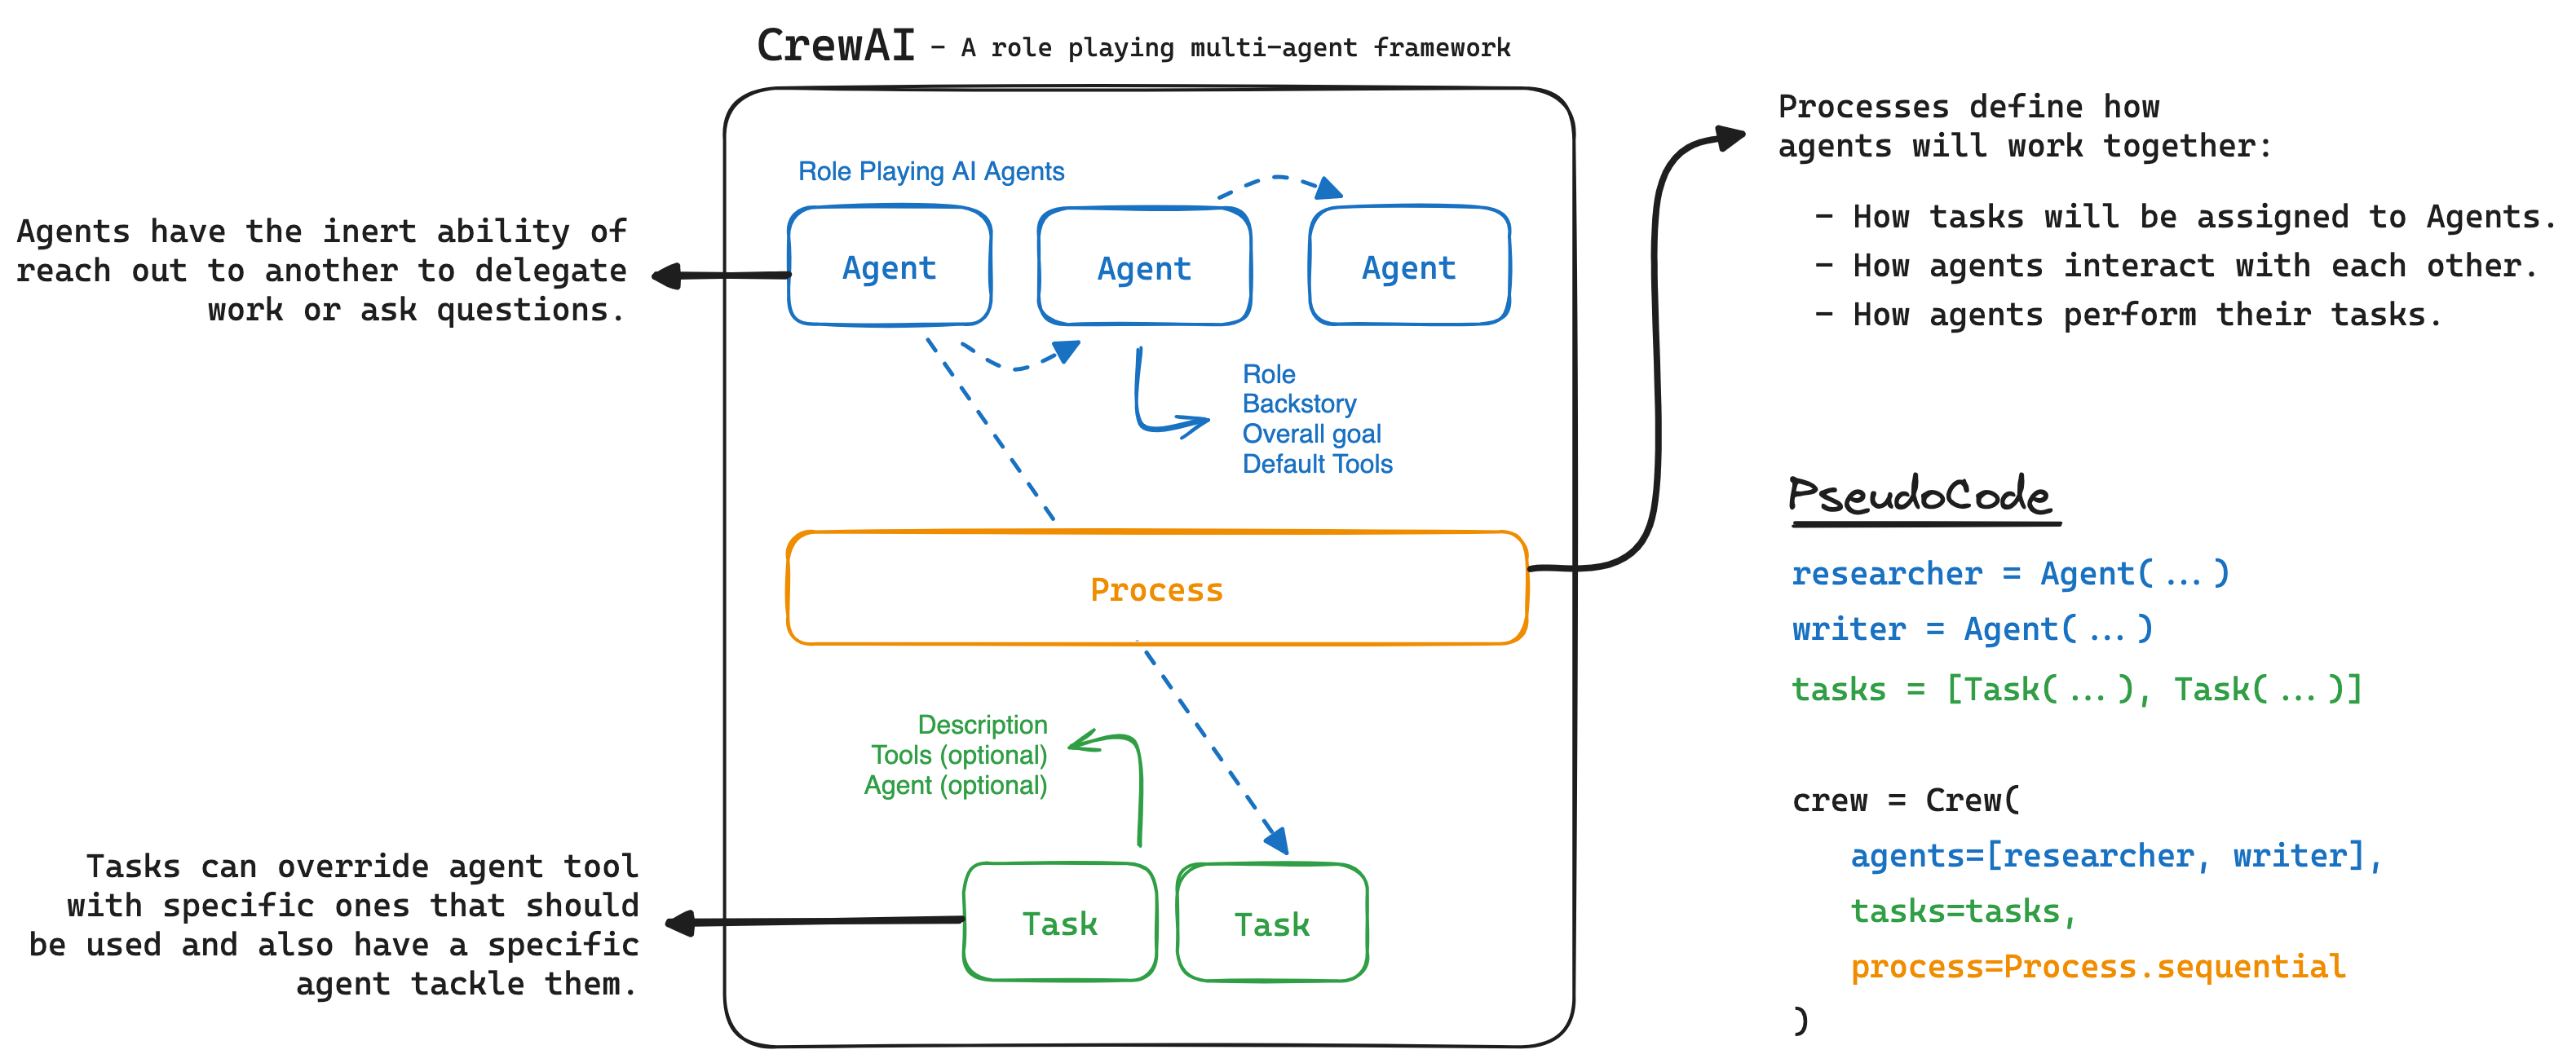


In [1]:
!pip install crewai

In [2]:
!pip install typing-extensions


In [3]:
!pip install fastapi kaleido python-multipart uvicorn cohere tiktoken


In [4]:
!pip install openai

In [5]:
!pip install duckduckgo-search

In [6]:
import os

In [7]:
from crewai import Agent, Task, Crew, Process

In [16]:
import openai

os.environ["OPENAI_API_KEY"] = "ENTER YOUR OWN OPEN AI API KEY"

New Task for Senior Research Analyst and Tech Content Strategist.

In [17]:
from langchain.tools import DuckDuckGoSearchRun
search_tool = DuckDuckGoSearchRun()

# Define your agents with roles and goals
researcher = Agent(
  role='Senior Research Analyst',
  goal='Uncover cutting-edge developments in AI and data science in',
  backstory="""You are a Senior Research Analyst at a leading tech think tank.
  Your expertise lies in identifying emerging trends and technologies in AI and
  data science. You have a knack for dissecting complex data and presenting
  actionable insights.""",
  verbose=True,
  allow_delegation=False,
  tools=[search_tool]
  # (optional) llm=ollama_llm, If you wanna use a local modal through Ollama, default is GPT4 with temperature=0.7

)
writer = Agent(
  role='Tech Content Strategist',
  goal='Craft compelling content on tech advancements',
  backstory="""You are a renowned Tech Content Strategist, known for your insightful
  and engaging articles on technology and innovation. With a deep understanding of
  the tech industry, you transform complex concepts into compelling narratives.""",
  verbose=True,
  # (optional) llm=ollama_llm, If you wanna use a local modal through Ollama, default is GPT4 with temperature=0.7
  allow_delegation=True
)

# Create tasks for your agents
task1 = Task(
  description="""Conduct a comprehensive analysis of the latest advancements in AI in 2024.
  Identify key trends, breakthrough technologies, and potential industry impacts.
  Compile your findings in a detailed report. Your final answer MUST be a full analysis report""",
  agent=researcher
)

task2 = Task(
  description="""Using the insights from the researcher's report, develop an engaging blog
  post that highlights the most significant AI advancements.
  Your post should be informative yet accessible, catering to a tech-savvy audience.
  Aim for a narrative that captures the essence of these breakthroughs and their
  implications for the future. Your final answer MUST be the full blog post of at least 3 paragraphs.""",
  agent=writer
)

# Instantiate your crew with a sequential process
crew = Crew(
  agents=[researcher, writer],
  tasks=[task1, task2],
  verbose=2, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
)

# Get your crew to work!
result = crew.kickoff()

print("######################")
print(result)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use langchain_openai.ChatOpenAI instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use langchain_openai.ChatOpenAI instead.
  warn_deprecated(


Working Agent: Senior Research Analyst
Starting Task: Conduct a comprehensive analysis of the latest advancements in AI in 2024.
  Identify key trends, breakthrough technologies, and potential industry impacts.
  Compile your findings in a detailed report. Your final answer MUST be a full analysis report ...


> Entering new CrewAgentExecutor chain...
Thought: To begin my analysis, I need to research the latest advancements and key trends in AI in 2024. DuckDuckGo would be a good tool to use for this initial research.
Action: duckduckgo_search
Action Input: latest advancements in AI 2024This year's trends reflect a deepening sophistication and caution in AI development and deployment strategies, with an eye to ethics, safety and the evolving regulatory landscape. Here are the top 10 AI and machine learning trends to prepare for in 2024. 1. Multimodal AI. Multimodal AI goes beyond traditional single-mode data processing to ... In 2024, generative AI might actually become useful for the 

New Tasks as Market Analyst and Environmental Journalist.

In [18]:
# Define your agents with roles and goals
researcher = Agent(
  role='Market Analyst',
  goal='To analyze current market trends in renewable energy',
  backstory="""As a Market Analyst at a sustainable energy consultancy,
  you specialize in analyzing market trends in the renewable energy sector.
  Your insights help companies understand the evolving landscape of green energy solutions.""",
  verbose=True,
  allow_delegation=False,
  tools=[search_tool]
  # (optional) llm=ollama_llm, If you wanna use a local modal through Ollama, default is GPT4 with temperature=0.7

)
writer = Agent(
  role='Environmental Journalist',
  goal='To create an engaging and informative article on renewable energy trends',
  backstory="""As an experienced Environmental Journalist,
  you have a talent for transforming complex environmental data into engaging stories.
  Your articles make technical information accessible to the general public.""",
  verbose=True,
  # (optional) llm=ollama_llm, If you wanna use a local modal through Ollama, default is GPT4 with temperature=0.7
  allow_delegation=True
)

# Create tasks for your agents
task1 = Task(
  description="""Perform a detailed market analysis on the current trends in renewable energy for 2024.
  This includes identifying growth areas, emerging technologies, and market leaders.
  Present your findings in a comprehensive market analysis report.
  Your final answer MUST be a full market analysis report.""",
  agent=researcher
)

task2 = Task(
  description="""Utilize the market analysis provided by the Market Analyst to write an engaging article.
  The article should highlight key trends in renewable energy for 2024, focusing on innovations and their potential environmental impacts.
  Your final answer MUST be the full article consisting of at least 3 well-structured paragraphs.""",
  agent=writer
)

# Instantiate your crew with a sequential process
crew = Crew(
  agents=[researcher, writer],
  tasks=[task1, task2],
  verbose=2, # Crew verbose more will let you know what tasks are being worked on, you can set it to 1 or 2 to different logging levels
  process=Process.sequential # Sequential process will have tasks executed one after the other and the outcome of the previous one is passed as extra content into this next.
)

# Get your crew to work!
result = crew.kickoff()

print("######################")
print(result)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use langchain_openai.ChatOpenAI instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:189: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use langchain_openai.ChatOpenAI instead.
  warn_deprecated(


Working Agent: Market Analyst
Starting Task: Perform a detailed market analysis on the current trends in renewable energy for 2024. 
  This includes identifying growth areas, emerging technologies, and market leaders. 
  Present your findings in a comprehensive market analysis report. 
  Your final answer MUST be a full market analysis report. ...


> Entering new CrewAgentExecutor chain...
Thought: I need to gather data on the current trends in renewable energy for 2024, including growth areas, emerging technologies, and market leaders. I can use the duckduckgo_search tool to find this information.
Action: duckduckgo_search
Action Input: renewable energy market trends 2024Jan. 5, 2024, at 4:24 p.m. Energy Investing Outlook for 2024. After a few tough years, the renewable energy industry could be primed for a comeback. Getty Images. Last year was a mediocre one for ... A rapid expansion of the renewable energy market will take course in 2024 as global efforts to ensure energy security,